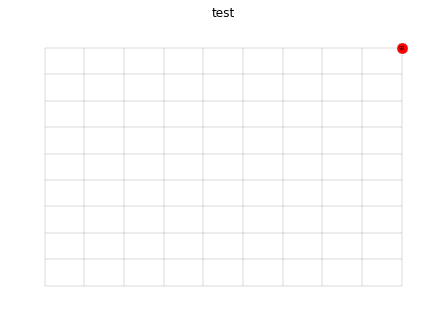

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_G(titletext, B):    
    
    list_S = []
    list_I = []
    list_R = []
    
    labels = {}
    
    for item in B:
    
        if item.sus == 1:
            list_S.append(i.grid_id)
        
        if item.inf == 1:
            list_I.append(i.grid_id)
            
        if item.rec == 1:
            list_R.append(i.grid_id)

        labels[i.grid_id] = i.num_id  

    pos = dict(zip(G,G)) # dictionary of node names->positions
    nx.draw(G, pos, nodelist = list_S, node_size = 90, node_color = 'lightgrey',
            with_labels = False, width = 0.05)
    nx.draw(G, pos, nodelist = list_I, node_size = 90, node_color = 'red',
            with_labels = False, width = 0.05)
    nx.draw(G, pos, nodelist = list_R, node_size = 90, node_color = 'green',
            with_labels = False, width = 0.05)
        
    nx.draw_networkx_labels(G, pos, labels, font_size = 5, font_color = 'black')
    plt.title(titletext)

class agent:
    
    # class attributes
    num_sus = 0
    num_inf = 0
    num_rec = 0
    
    def __init__(self, num, grid_node):
        
        # instance/object attributes
        self.num_id = num
        self.grid_id = grid_node
        
        self.sus = 1 
        agent.num_sus += 1
        
        self.inf = 0
        self.inf_t1 = 0
        self.days_sick = 0
        
        self.rec = 0
    
    def getsick(self):
        
        self.sus = 0
        agent.num_sus -= 1
        
        self.inf_t1 = 1
        #self.inf = 1
        agent.num_inf += 1
        
    def recover(self):
        
        self.inf = 0
        agent.num_inf -= 1
        
        self.rec = 1
        agent.num_rec += 1

T = 1 # number of days/time periods

grid_side = 10 # one dimension of the grid
N = grid_side * grid_side # total agents

pr_sick = 0.3 # probability of getting sick, S meets I
time_recov = 14 # days to recover

# grid_size by grid_size lattice
G = nx.grid_2d_graph(grid_side, grid_side, periodic = False)

A = [] # list of all agents

G_nodes = list(G.nodes)
for i in range(N):
    A.append(agent(i, G_nodes[i]))
    
GA_dict = {} # dictionary {grid_id: agent_id}

for i in A:
    GA_dict[i.grid_id] = i.num_id
    
#plt.figure(num=1, figsize=(6, 3), dpi=300, facecolor='w', edgecolor='k')
#plt.subplot(121)
#plot_G("Before",A)

#for i in A:
 #   if i.num_id >= 41 and i.num_id <= 48:
  #      i.getsick()
        
   # if i.num_id >= 51 and i.num_id <= 58:
    #    i.recover()
    
#plt.subplot(122)
#plot_G("After",A)

A[50].getsick()

# time loop starts here
for t in range(T):
    for i in A:
        if i.inf == 1:
            i.days_sick += 1
            if i.days_sick == 7:
                i.recover()
#     # for testing; use small grid side
#     for g in G.edges:
#         print("New edge: ")
#         print(g)
#         a1 = GA_dict[g[0]]
#         a2 = GA_dict[g[1]]
#         print(f"Agents' ids: {a1}, {a2}")
#         print()
        
# plot_G("testing")  

    for g in G.edges:
        a1 = A[GA_dict[g[0]]]
        a2 = A[GA_dict[g[1]]] 
        if a1.inf == 1 and a2.sus == 1:
            a2.getsick()
        if a2.inf == 1 and a1.sus == 1:
            a1.getsick()
    
    for i in A:
        if i.inf_t1 == 1:
            i.inf = 1
            i.inf_t1 = 0
        
plot_G("test", A)